### **After Exploring our data, we found out that all our variables except Residence Type and ID were relevant to our analysis i.e. they were affecting our target variable in some way or the other**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, clear_output

In [5]:
dataset= pd.read_csv("stroke prediction.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
dataset.drop(columns=["id","Residence_type"],inplace=True)

In [7]:
dataset["gender"]=dataset["gender"].astype('category')
dataset["ever_married"]=dataset["ever_married"].astype('category')
# dataset["Residence_type"]=dataset["Residence_type"].astype('category')
dataset["work_type"]=dataset["work_type"].astype('category')
dataset["smoking_status"]=dataset.smoking_status.astype("category")

In [8]:
dataset_imputed=dataset.copy()

In [9]:
dataset_imputed.dtypes

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

dataset_imputed.gender=encoder.fit_transform(dataset_imputed.gender)

dataset_imputed.ever_married=encoder.fit_transform(dataset_imputed.ever_married)

dataset_imputed.work_type=encoder.fit_transform(dataset_imputed.work_type)

# dataset_imputed.Residence_type=encoder.fit_transform(dataset_imputed.Residence_type)

dataset_imputed.smoking_status=dataset_imputed.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2})

In [ ]:
X=dataset_imputed.drop(columns="stroke",axis=1)
y=dataset_imputed["stroke"]

In [11]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(dataset_imputed,test_size=0.2,random_state=88,stratify=dataset_imputed.stroke)

In [ ]:
train

In [9]:
from sklearn.impute import KNNImputer

imputer=KNNImputer()

X_trimputed=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

X_teimputed=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [10]:
X_trimputed["smoking_status"]=X_trimputed["smoking_status"].apply(round)
X_trimputed["smoking_status"].value_counts()

X_trimputed["smoking_status"]=X_trimputed["smoking_status"].astype('category')
X_trimputed["work_type"]=X_trimputed["work_type"].apply(int)
X_trimputed["work_type"]=X_trimputed["work_type"].astype('category')

In [11]:
X_teimputed["smoking_status"]=X_teimputed["smoking_status"].apply(round)
X_teimputed["smoking_status"].value_counts()

X_teimputed["smoking_status"]=X_teimputed["smoking_status"].astype('category')
X_teimputed["work_type"]=X_teimputed["work_type"].apply(int)
X_teimputed["work_type"]=X_teimputed["work_type"].astype('category')

In [12]:
X_trimputed["gender"]=X_trimputed["gender"].astype("category")
X_trimputed[["hypertension","heart_disease","ever_married"]]=X_trimputed[["hypertension","heart_disease","ever_married"]].astype("int")

X_teimputed["gender"]=X_teimputed["gender"].astype("category")
X_teimputed[["hypertension","heart_disease","ever_married"]]=X_teimputed[["hypertension","heart_disease","ever_married"]].astype("int")

In [13]:
X_trimputed=pd.get_dummies(X_trimputed,drop_first=True)
X_teimputed=pd.get_dummies(X_teimputed,drop_first=True)

In [14]:
X_trimputed

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_1.0,gender_2.0,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2
0,4.0,0,0,0,136.51,17.1,1,0,0,0,0,1,0,0
1,9.0,0,0,0,90.55,27.3,1,0,0,0,0,1,0,0
2,29.0,0,0,1,108.69,29.6,1,0,0,1,0,0,0,0
3,63.0,0,0,1,84.57,31.2,1,0,0,1,0,0,1,0
4,67.0,0,0,1,70.43,26.3,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34715,62.0,0,0,1,58.90,29.1,0,0,0,1,0,0,1,0
34716,43.0,0,0,0,94.82,29.7,0,0,0,0,0,0,0,0
34717,23.0,0,0,0,98.66,28.3,0,0,0,1,0,0,0,0
34718,9.0,0,0,0,150.00,17.4,1,0,0,0,0,1,0,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_trimputed)

X_trimputed=pd.DataFrame(scaler.transform(X_trimputed),columns=X_trimputed.columns)

X_teimputed=pd.DataFrame(scaler.transform(X_teimputed),columns=X_teimputed.columns)

In [16]:
X_trimputed.head(2)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_1.0,gender_2.0,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2
0,0.047852,0.0,0.0,0.0,0.345280,0.080000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.108887,0.0,0.0,0.0,0.150568,0.196571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report as rep
from sklearn.metrics import f1_score

In [18]:
logreg=LogisticRegression()

logreg.fit(X_trimputed,y_train)
y_train_pred=logreg.predict(X_trimputed)

y_test_pred=logreg.predict(X_teimputed)

In [19]:
print("Train Report")

print(rep(y_train, y_train_pred))

print("Test Report")

print(rep(y_test, y_test_pred))

Train Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34094
           1       0.00      0.00      0.00       626

    accuracy                           0.98     34720
   macro avg       0.49      0.50      0.50     34720
weighted avg       0.96      0.98      0.97     34720

Test Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**This is behaving as a dumb model, all the values are being predicted as 0**

In [20]:
y_train_prob=logreg.predict_proba(X_trimputed)[:,1]
y_train_prob

y_test_prob=logreg.predict_proba(X_teimputed)[:,1]
y_test_prob


array([0.04182998, 0.00670357, 0.01573857, ..., 0.00361589, 0.01125902,
       0.00872016])

In [21]:
y_train_pred = list(map( lambda x: 1 if x>0.07 else 0, y_train_prob))

print(rep(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     34094
           1       0.10      0.33      0.15       626

    accuracy                           0.93     34720
   macro avg       0.54      0.64      0.56     34720
weighted avg       0.97      0.93      0.95     34720



In [22]:
y_test_pred = list(map( lambda x: 1 if x>0.07 else 0, y_test_prob))

print(rep(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8523
           1       0.10      0.35      0.16       157

    accuracy                           0.93      8680
   macro avg       0.55      0.65      0.56      8680
weighted avg       0.97      0.93      0.95      8680



**Our Predicted Probabilities are coming out to be nearly 0 for the Minor Class**

**The Model is Underfitting our Data, hence there is High Bias and Low Variance**

## Logistic Regression (Weight Balanced)

In [28]:
logreg=LogisticRegression(class_weight = 'balanced')

logreg.fit(X_trimputed,y_train)
y_train_pred=logreg.predict(X_trimputed)

y_test_pred=logreg.predict(X_teimputed)

In [29]:
print("Train Report")

print(rep(y_train, y_train_pred))

print("Test Report")

print(rep(y_test, y_test_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     34094
           1       0.05      0.82      0.10       626

    accuracy                           0.74     34720
   macro avg       0.53      0.78      0.47     34720
weighted avg       0.98      0.74      0.83     34720

Test Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8523
           1       0.05      0.83      0.10       157

    accuracy                           0.74      8680
   macro avg       0.53      0.78      0.47      8680
weighted avg       0.98      0.74      0.83      8680



In [30]:
y_train_prob=logreg.predict_proba(X_trimputed)[:,1]
y_train_prob

y_test_prob=logreg.predict_proba(X_teimputed)[:,1]
y_test_prob


array([0.70439085, 0.20426914, 0.44244751, ..., 0.11896566, 0.38399405,
       0.29028772])

In [37]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train,y_train_prob),roc_auc_score(y_test,y_test_prob)

(0.85218150870615, 0.8520481484719878)

## KNN 

In [39]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [40]:
from sklearn.model_selection import cross_val_score

In [98]:
# def val_score(n_neighbors):
    
#     avg=[]
#     std=[]
    
    
#     for i in n_neighbors:
#         score = cross_val_score(KNN(n_neighbors=i),scoring='f1',X=X_trimputed, y=y_train, cv=10)
        
        
#         avg.append(score.mean())
#         std.append(score.std())
        
#     return avg,std

In [99]:
# n_neighbors = range(1,10)
# mean, std = val_score(n_neighbors)

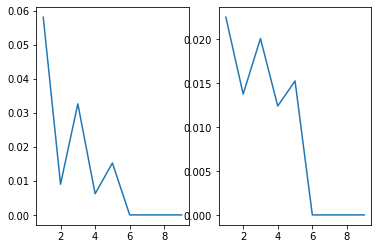

In [130]:
fig,ax=plt.subplots(1,2,figsize=(14,7))

sns.lineplot(y=mean,x=range(1,10),ax=ax[0])
sns.lineplot(y=std,x=range(1,10),ax=ax[1])

**Our Model is fitting well for only 3 nearest neighbours**

In [48]:
classifier=KNN(n_neighbors=3)

classifier.fit(X_trimputed,y_train)

y_train_pred=classifier.predict(X_trimputed)
y_test_pred=classifier.predict(X_teimputed)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.20301783264746226, 0.08290155440414508)

In [49]:
y_train_prob=classifier.predict_proba(X_trimputed)[:,1]
y_train_prob

y_test_prob=classifier.predict_proba(X_teimputed)[:,1]
y_test_prob


array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
roc_auc_score(y_train,y_train_prob),roc_auc_score(y_test,y_test_prob)

(0.9842778216436385, 0.5720287778816555)

**Again, the F1 score is coming out to be very less. It is performing worse than Logistic Regression with a weight parameter**

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
classifier=DecisionTreeClassifier(random_state=40,class_weight='balanced')

classifier.fit(X_trimputed,y_train)

y_train_pred = classifier.predict(X_trimputed)
y_test_pred = classifier.predict(X_teimputed)

In [71]:
print(rep(y_train,y_train_pred))
print(rep(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34094
           1       1.00      1.00      1.00       626

    accuracy                           1.00     34720
   macro avg       1.00      1.00      1.00     34720
weighted avg       1.00      1.00      1.00     34720

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8523
           1       0.03      0.03      0.03       157

    accuracy                           0.96      8680
   macro avg       0.51      0.51      0.51      8680
weighted avg       0.96      0.96      0.96      8680



In [72]:
f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(1.0, 0.03154574132492114)

In [73]:
y_train_prob=classifier.predict_proba(X_trimputed)[:,1]
y_train_prob

y_test_prob=classifier.predict_proba(X_teimputed)[:,1]
y_test_prob


array([1., 0., 0., ..., 0., 0., 0.])

In [74]:
roc_auc_score(y_train,y_train_prob),roc_auc_score(y_test,y_test_prob)

(1.0, 0.5068305245230029)

**Decision Trees tend to overfit our data if they are not pruned. We can see that the train F1 scores are coming out to be 1.0 but the test is very less. There is High Variance and Low Bias in our Model.**

In [75]:
path=classifier.cost_complexity_pruning_path(X_trimputed,y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.44879943e-05, 1.45319266e-05, 1.45319266e-05,
        1.45319266e-05, 1.45319266e-05, 1.45319266e-05, 1.45319266e-05,
        1.45319266e-05, 1.45319266e-05, 1.45319266e-05, 1.45319266e-05,
        1.45319266e-05, 1.45319266e-05, 1.45319266e-05, 1.45319266e-05,
        1.45319266e-05, 1.45319266e-05, 1.45319266e-05, 1.45319266e-05,
        1.45319266e-05, 1.45319266e-05, 1.45319266e-05, 1.45319266e-05,
        1.45319266e-05, 1.45319266e-05, 1.45319266e-05, 1.45319266e-05,
        1.45761262e-05, 1.45761262e-05, 1.45761262e-05, 1.45761262e-05,
        1.45761262e-05, 1.45761262e-05, 1.45761262e-05, 1.45761262e-05,
        1.45761262e-05, 1.45761262e-05, 1.45761262e-05, 1.45761262e-05,
        1.45983270e-05, 1.45983270e-05, 1.45983270e-05, 1.45983270e-05,
        1.45983270e-05, 1.45983270e-05, 1.45983270e-05, 1.46116800e-05,
        1.46116800e-05, 1.91138922e-05, 1.92443040e-05, 1.93316353e-05,
        1.94112189e-05, 1.94137218e-05, 1.94517388

In [76]:
alphas,impurities=path.ccp_alphas,path.impurities

In [77]:
alphas.min(),alphas.max()

(0.0, 0.14654874693823133)

In [84]:
x_alphas=np.arange(0.0,0.40,0.1)

In [85]:
train_f1=[]
test_f1=[]

for i in x_alphas:
    classifier=DecisionTreeClassifier(class_weight='balanced',ccp_alpha=i,random_state=40)

    classifier.fit(X_trimputed,y_train)

    y_train_pred = classifier.predict(X_trimputed)
    y_test_pred = classifier.predict(X_teimputed)
    
    train_f1.append(roc_auc_score(y_train,y_train_pred))
    test_f1.append(roc_auc_score(y_test,y_test_pred))

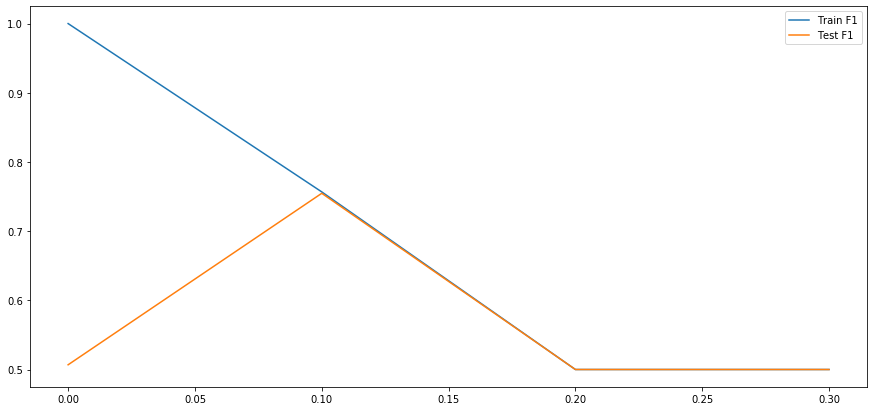

In [86]:
plt.figure(figsize=(15,7))

sns.lineplot(y=train_f1,x=x_alphas,label="Train F1")
sns.lineplot(y=test_f1,x=x_alphas,label="Test F1")

In [147]:
df=pd.DataFrame({"alphas":alphas,"train_f1":train_f1,"test_f1":test_f1})
df[df.test_f1==df.test_f1.max()]

,alphas,train_f1,test_f1
133,0.000027,0.768780,0.090566
134,0.000027,0.768780,0.090566
135,0.000027,0.768780,0.090566
136,0.000027,0.768780,0.090566
137,0.000027,0.767578,0.090566


In [87]:
classifier=DecisionTreeClassifier(ccp_alpha=0.10,random_state=40,class_weight='balanced')

classifier.fit(X_trimputed,y_train)

y_train_pred = classifier.predict(X_trimputed)
y_test_pred = classifier.predict(X_teimputed)

f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.07690242920413366, 0.07625099285146941)

In [88]:
y_train_prob=classifier.predict_proba(X_trimputed)[:,1]
y_train_prob

y_test_prob=classifier.predict_proba(X_teimputed)[:,1]
y_test_prob


array([0.69488169, 0.12400585, 0.12400585, ..., 0.12400585, 0.69488169,
       0.69488169])

In [89]:
roc_auc_score(y_train,y_train_prob),roc_auc_score(y_test,y_test_prob)

(0.7567086185889752, 0.7546799181831702)

**This is the maximum test score we are getting on the original split using a decision tree which is not sufficient**

## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,f1_score

In [20]:
naivebayes=GaussianNB()

In [29]:
naivebayes.fit(X_trimputed,y_train)
y_train_pred=naivebayes.predict(X_trimputed)
y_test_pred=naivebayes.predict(X_teimputed)

In [24]:
y_train_prob=naivebayes.predict_proba(X_trimputed)[:,1]
y_test_prob=naivebayes.predict_proba(X_teimputed)[:,1]

In [25]:
roc_auc_score(y_train,y_train_prob),roc_auc_score(y_test,y_test_prob)

(0.821759906973972, 0.8289506625384591)

In [30]:
f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.04183006535947713, 0.042380888109056554)